<a href="https://colab.research.google.com/github/EunSeong-Jo/2025-1-myclass-BDA/blob/main/titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CRISP-DM 프로세스를 이용한 타이타닉호 데이터 분석

#### CRISP-DM 프로세스란?

<span style="font-size:20px;"> CRISP-DM(Cross Industry Standard Process for Data Mining) <br>
<span style="font-size:18px;"> 데이터 분석과 데이터 마이닝 분야에서 가장 널리 사용되는 표준 프로세스입니다.  
<span style="font-size:18px;"> 총 6단계로 이루어져 있으며, 실제 산업, 학계, 공모전 등에서 데이터 분석 프로젝트의 기본 뼈대 역할을 합니다.

---

##### 1. 비즈니스 이해 (Business Understanding)
- <span style="font-size:18px;"> 분석의 목적과 배경, 해결하고자 하는 비즈니스 문제를 명확히 정의합니다.
- <span style="font-size:18px;"> 목표 설정 및 프로젝트의 성공 기준을 결정합니다.

##### 2. 데이터 이해 (Data Understanding)
- <span style="font-size:18px;"> 관련 데이터를 수집하고, 데이터의 구조, 특성, 품질을 파악합니다.
- <span style="font-size:18px;"> 데이터 탐색(EDA) 및 기본적인 통계/시각화를 통해 데이터에 대한 인사이트를 얻습니다.

##### 3. 데이터 준비 (Data Preparation)
- <span style="font-size:18px;"> 분석에 필요한 데이터를 정제하고 가공합니다.
- <span style="font-size:18px;"> 결측치 및 이상치 처리, 변수 변환, 데이터 통합, 파생변수 생성 등을 수행합니다.

##### 4. 모델링 (Modeling)
- <span style="font-size:18px;"> 다양한 분석 모델(머신러닝/통계모델 등)을 선택하고 적용합니다.
- <span style="font-size:18px;"> 모델의 파라미터를 튜닝하고, 최적의 모델을 선정합니다.

##### 5. 평가 (Evaluation)
- <span style="font-size:18px;"> 모델의 성능을 다양한 지표(정확도, 재현율 등)로 평가합니다.
- <span style="font-size:18px;"> 비즈니스 목표에 부합하는지 해석하고, 모델 결과를 검증합니다.

##### 6. 배포 (Deployment)
- <span style="font-size:18px;"> 분석 결과를 실제 업무에 적용하거나, 서비스/시스템에 반영합니다.
- <span style="font-size:18px;"> 분석 과정과 결과를 보고서, 대시보드, 프레젠테이션 등 다양한 형태로 공유합니다.

---

1. 비즈니스 이해

<span style="font-size:18px;"> 타이타닉호 데이터 분석을 통해 어떤 인사이트를 얻을 수 있는가?

<span style="font-size:18px;"> 만약 나였다면 타이타닉호에서 생존할 수 있는가?

##### <b>분석 목표 : 생존 여부 및 확률 분석

---

2. 데이터 이해

In [ ]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("./titanic1309.csv")

In [ ]:
# 데이터 상위 3개 행 미리보기
print(df.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [ ]:
# 주요 통계 요약
# 평균 생존확률(Survived)은 약 38%
print(df.describe())

       PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


##### 총 12개 속성
PassengerId (고유번호) <br>
Survived (생존여부) - <b>분석 목표</b> <br>
Pclass (객실 등급) <br>
Name (이름) <br>
Sex (성별) <br>
Age (나이) <br>
SibSp (형제자매, 배우자 수) <br>
Parch (부모, 자녀 수) <br>
Ticket (티켓 번호) <br>
Fare (승선 요금) <br>
Cabin (객실 번호) <br>
Embarked (탑승 항구) <br>

In [ ]:
# 데이터 요약 정보 (컬럼, 결측치, 타입 등)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
None


In [ ]:
# 결측치 확인
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


<Axes: >

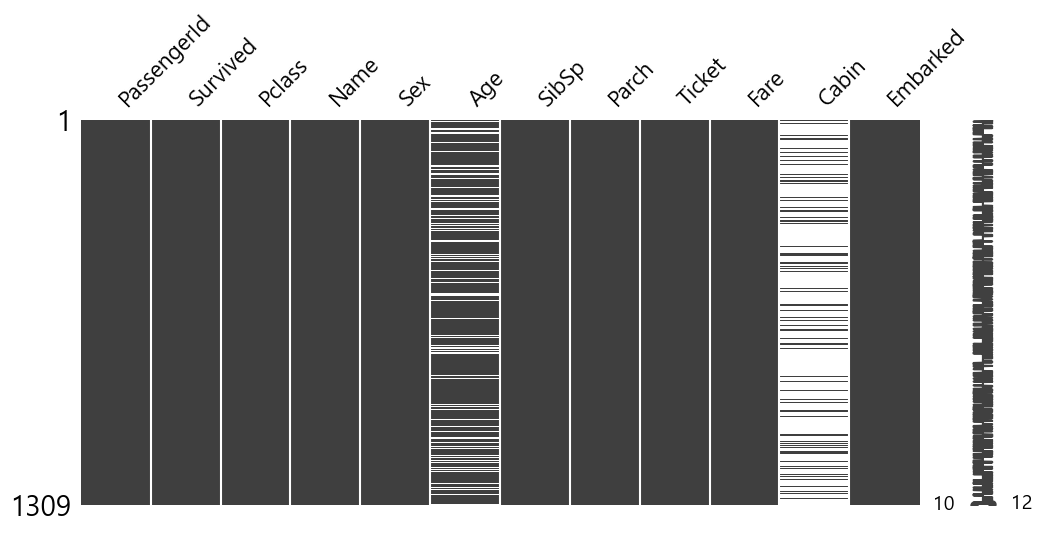

In [ ]:
import missingno as msno

# 그래프 크기 (12, 5)로 설정
msno.matrix(df, figsize=(12, 5))

In [ ]:
# 상관계수 분석을 통해 결측치 처리여부 결정
# 생존률에 대한 상관계수
print(df.corr(numeric_only=True)['Survived'])

PassengerId   -0.020370
Survived       1.000000
Pclass        -0.264710
Age           -0.053695
SibSp          0.002370
Parch          0.108919
Fare           0.233622
Name: Survived, dtype: float64


In [ ]:
# 상관계수 측정은 수치형 변수만 가능함으로 범주형 변수를 수치형으로 변환
# 컬럼의 개수가 많아지는 것을 우려해 원핫 인코딩이 아닌 단순 대입 방식을 사용

# 1. 성별(Sex) : male=0, female=1로 변환
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 2. 탑승항구(Embarked) : C=0, Q=1, S=2로 변환
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 변환 결과 미리보기
print(df[['Sex', 'Embarked']].head())

   Sex  Embarked
0    0       2.0
1    1       0.0
2    1       2.0
3    1       2.0
4    0       2.0


In [ ]:
# object 타입중 'Name', 'Ticket', 'Cabin' 항목은 명확한 분류 기준이 없는 데이터로 수치형 변수로 변환하기 부적합

df['Name'].value_counts()

Name
Connolly, Miss. Kate                                               2
Kelly, Mr. James                                                   2
Bonnell, Miss. Elizabeth                                           1
Peter, Master. Michael J                                           1
Braund, Mr. Owen Harris                                            1
                                                                  ..
Frolicher-Stehli, Mrs. Maxmillian (Margaretha Emerentia Stehli)    1
Larsson-Rondberg, Mr. Edvard A                                     1
Conlon, Mr. Thomas Henry                                           1
Bonnell, Miss. Caroline                                            1
Gibson, Miss. Dorothy Winifred                                     1
Name: count, Length: 1307, dtype: int64

In [ ]:
df['Ticket'].value_counts().head(5)

Ticket
CA. 2343        11
1601             8
CA 2144          8
347082           7
S.O.C. 14879     7
Name: count, dtype: int64

In [ ]:
df['Cabin'].value_counts().head(5)

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
Name: count, dtype: int64

In [ ]:
# 다시 한번 상관계수
print(df.corr(numeric_only=True)['Survived'])

PassengerId   -0.020370
Survived       1.000000
Pclass        -0.264710
Sex            0.688371
Age           -0.053695
SibSp          0.002370
Parch          0.108919
Fare           0.233622
Embarked      -0.136574
Name: Survived, dtype: float64


In [ ]:
# 생존확률에 나이는 중요한 변수 같은데 생각보다 생존과 연관성이 적게 나옴
# 생존확률과 나이를 그래프로 표현하여 상관관계를 예측
print(df['Age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [ ]:
# 나이대 구간을 나누기 위한 최대값, 최소값 탐색
print("최대값 : " , df['Age'].max())
print("최소값 : " , df['Age'].min())

최대값 :  80.0
최소값 :  0.17


C:\Users\asus\AppData\Local\Temp\ipykernel_39732\1800241006.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = df_age.groupby('AgeGroup')['Survived'].mean()


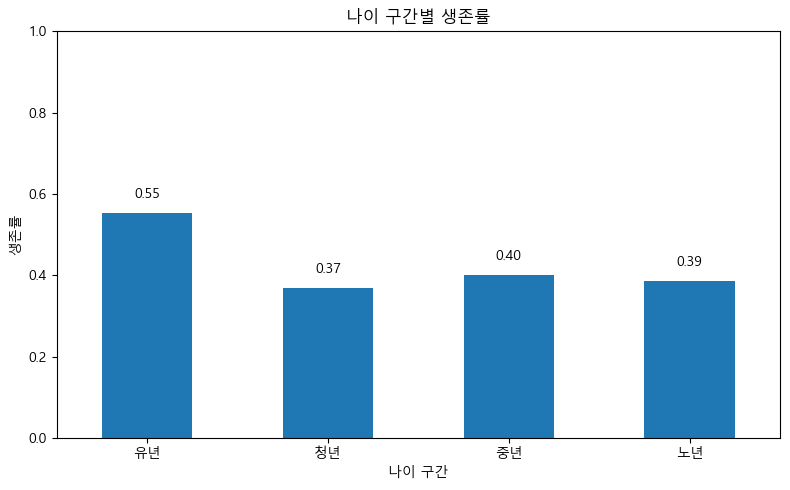

In [ ]:
# Age가 결측치가 아닌 데이터만 사용
df_age = df[df['Age'].notna()].copy()

# 나이 구간 설정
bins = [0, 13, 30, 50, 80]
labels = ['유년', '청년', '중년', '노년']
df_age['AgeGroup'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)

# 각 나이구간별 생존률 계산
agegroup_survival = df_age.groupby('AgeGroup')['Survived'].mean()

# 시각화 (그래프에 생존률 수치 표시)
ax = agegroup_survival.plot(kind='bar', rot=0, figsize=(8,5))
plt.title('나이 구간별 생존률')
plt.xlabel('나이 구간')
plt.ylabel('생존률')
plt.ylim(0, 1)

for idx, value in enumerate(agegroup_survival):
    plt.text(idx, value + 0.03, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show();

만약 생존률과 나이의 상관관계가 없다면 각 세대별 생존확률이 평균 생존확률(38%)로 일정해야함

유년기(0~12세)의 생존확률이 상대적으로 높은것으로 보아 나이는 생존률과 연관이 있다고 볼 수 있음

In [ ]:
# 상관계수가 상대적으로 높은 항목에 대해 생존률 분석
# 나이 구간별 생존률은 완료, Pclass(객실 등급), Sex(성별), Fare(승선 요금)에 대한 생존률 분석

print("객실 등급 생존률(%)")
print((df.groupby('Pclass')['Survived'].mean() * 100).round(2).astype(str) + '%')

객실 등급 생존률(%)
Pclass
1    57.59%
2    42.24%
3    26.94%
Name: Survived, dtype: object


In [ ]:
print("성별 생존률(%)")
print((df.groupby('Sex')['Survived'].mean() * 100).round(2).astype(str) + '%')

성별 생존률(%)
Sex
0    12.93%
1    82.62%
Name: Survived, dtype: object


In [ ]:
# Fare를 분위수 기준 4개 구간으로 나누기
# 1분위(0~25%), 2분위(25~50%), 3분위(50~75%), 4분위(75~100%)
df_fare = df[df['Fare'].notna()].copy()
df_fare['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['1분위', '2분위', '3분위', '4분위'])

print("요금 구간별 생존률(%)")
print((df_fare.groupby('FareGroup')['Survived'].mean() * 100).round(2).astype(str) + '%')

요금 구간별 생존률(%)
FareGroup
1분위    21.96%
2분위    29.38%
3분위    43.29%
4분위    56.97%
Name: Survived, dtype: object


C:\Users\asus\AppData\Local\Temp\ipykernel_39732\4193377951.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((df_fare.groupby('FareGroup')['Survived'].mean() * 100).round(2).astype(str) + '%')


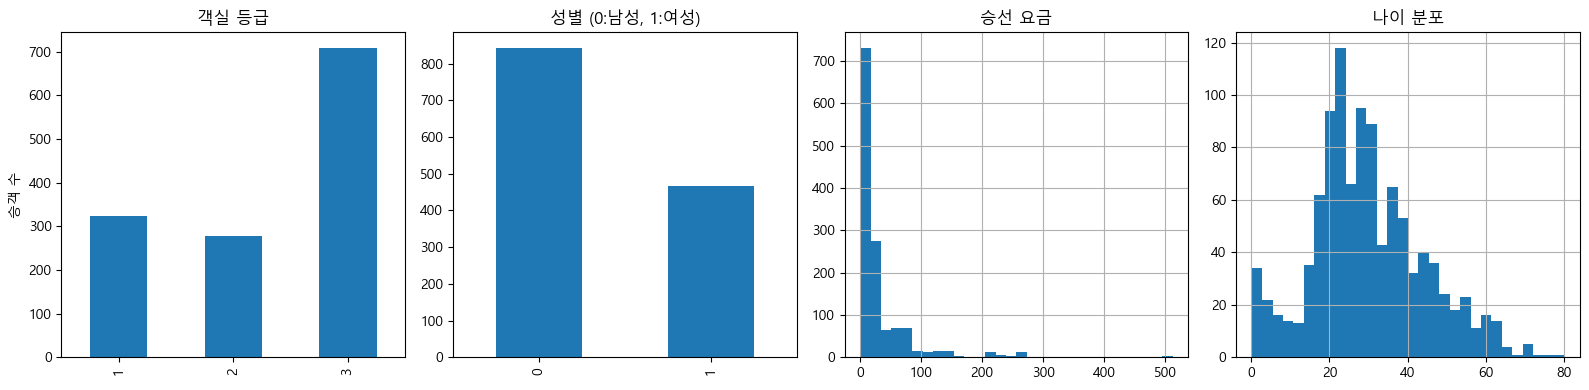

In [ ]:
import matplotlib.pyplot as plt

# 1행 4열(총 4칸)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()

# 1. Pclass
df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('객실 등급')
axes[0].set_xlabel('')
axes[0].set_ylabel('승객 수')

# 2. Sex
df['Sex'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('성별 (0:남성, 1:여성)')
axes[1].set_xlabel('')

# 3. Fare
df['Fare'].hist(bins=30, ax=axes[2])
axes[2].set_title('승선 요금')
axes[2].set_xlabel('')

# 4. Age
df['Age'].hist(bins=30, ax=axes[3])
axes[3].set_title('나이 분포')
axes[3].set_xlabel('')

plt.tight_layout()
plt.show();

3. 데이터 준비

In [ ]:
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [ ]:
# Age(나이) 항목이 생존률과 연관되어 있는걸 확인했기 때문에 해당 속성을 예측에 사용할 수 있게 결측치를 채워줌

# Age 결측치을 채우기 위한 평균값, 중간값 구하기
print("평균값 : " , df['Age'].mean())
print("중앙값 : " , df['Age'].median())

평균값 :  29.881137667304014
중앙값 :  28.0


In [ ]:
# Age 결측치 중간값으로 채우기
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
# Embarked 결측치(2개) 최빈값으로 채우기
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# Fare 결측치(1개) 중앙값으로 채우기
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [ ]:
# 객실 등급(Pclass)과 객실 번호(Cabin)의 연관성
print(df[['Pclass', 'Cabin']].dropna().head(10))

    Pclass        Cabin
1        1          C85
3        1         C123
6        1          E46
10       3           G6
11       1         C103
21       2          D56
23       1           A6
27       1  C23 C25 C27
31       1          B78
52       1          D33


titanic.png

In [ ]:
# 객실 번호는 객실 등급 항목으로 대체될 수 있음 (번호 앞자리가 C이면 1등급)
# 객실 번호는 수치적 의미가 없고 결측치 비율이 높기 때문에 제거
df = df.drop('Cabin', axis=1)

In [ ]:
# 결측값이 없고 객실 등급(Cabin)이 제거된 데이터 셋
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 112.6+ KB


In [ ]:
# 학습을 위해 object 항목인 Name과 Ticket 항목을 제거
df = df.drop(['Name', 'Ticket'], axis=1)

In [ ]:
# 수치형 데이터가 남은 모습
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


4. 모델링

In [ ]:
from sklearn.model_selection import train_test_split

# 종속변수와 독립변수 설정
X = df.drop(['Survived', 'PassengerId'], axis=1)  # 필요 없는 컬럼 제거
y = df['Survived']

# 학습용/테스트용 데이터셋 분리 (예: 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습
# max_iter : 반복 횟수
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

5. 평가

In [ ]:
from sklearn.metrics import accuracy_score

# 예측
y_pred = model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.8549618320610687


6. 배포

In [ ]:
import numpy as np

# 사용자 입력
input_age = int(input("나이를 입력하세요 : "))
input_sex_str = input("성별을 입력하세요 (남성 / 여성) : ")

# 성별을 숫자로 변환 (0=남성, 1=여성)
if input_sex_str == "남성":
    input_sex = 0
elif input_sex_str == "여성":
    input_sex = 1
else:
    raise ValueError("성별은 '남성' 또는 '여성'만 입력하세요.")

# 나머지 항목은 중앙값으로 대체
default_pclass = int(df['Pclass'].median())
default_sibsp = int(df['SibSp'].median())
default_parch = int(df['Parch'].median())
default_fare = df['Fare'].median()
default_embarked = int(df['Embarked'].median())

# 예측에 사용할 입력 데이터 (순서: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked)
input_data = np.array([[default_pclass, input_sex, input_age, default_sibsp, default_parch, default_fare, default_embarked]])

# 생존 확률 예측
survival_prob = model.predict_proba(input_data)[0][1]
print(f"{input_age}세 {input_sex_str}의 생존 확률 : {survival_prob * 100:.2f}% \n")

# 예측 결과
prediction = model.predict(input_data)[0]

if prediction == 1:
    pred_str = "생존"
else:
    pred_str = "사망"

print(f"예측 결과: {pred_str}")

25세 남성의 생존 확률 : 8.11% 

예측 결과: 사망


c:\Users\asus\anaconda3\envs\dmu\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\asus\anaconda3\envs\dmu\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
